<h3>Import all necessary Libraries<h3>

In [203]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [76]:
#Read in file
data = pd.read_csv('Credit_Score_Classification.csv')
data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_19340\471064921.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Credit_Score_Classification.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


<h3>Data Exploration and Cleaning<h3>

In [77]:
data.shape

(100000, 28)

In [162]:
df = data.copy()

In [163]:
df = df.drop(['ID','Customer_ID', 'Name', 'SSN'], axis = 1)

In [164]:
#Value count on all columns to check values in columns and their frequency
for i in df.columns:
    print(f"{i}")
    print('________________________')
    print(f"{df[i].value_counts()}")

Month
________________________
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Age
________________________
Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: count, Length: 1788, dtype: int64
Occupation
________________________
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64
Annual_Income
________________________
Annual_Income
36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
202

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [167]:
#This "'!@9#%8'" was noticed in payment behavior column and was filtered out because it could not be related to any of the other values
df = df[~(df['Payment_Behaviour'] == '!@9#%8')]

In [168]:
#Separated categorical data from numerical data
cat = df.select_dtypes(exclude='number')
num = df.select_dtypes(include='number')

print('categorical data')
display(cat.head())
print('numerical data')
display(num.head())

categorical data


,Month,Age,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,February,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,March,-500,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,April,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,May,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.42015309,High_spent_Medium_value_payments,341.489231,Good


numerical data


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
0,1824.843333,3,4,3,3,4.0,26.822620,49.574949
1,NaN,3,4,3,-1,4.0,31.944960,49.574949
2,NaN,3,4,3,3,4.0,28.609352,49.574949
3,NaN,3,4,3,5,4.0,31.377862,49.574949
4,1824.843333,3,4,3,6,4.0,24.797347,49.574949


<h3>Investigation to determine why some columns with numerical figures were appearing as objects<h3>

In [169]:
df['Age'].sample(50).values

array(['44_', '23_', '16', '51', '39', '41_', '26', '25', '19', '39',
       '18_', '22', '23', '15', '39_', '34', '31', '20', '44', '21', '49',
       '-500', '23', '34', '33_', '41', '6922', '42', '38', '-500', '36',
       '21', '20', '34', '17', '23', '21', '50', '23', '18', '19', '36',
       '40', '19', '23', '55', '23', '23', '34', '33'], dtype=object)

In [170]:
df['Annual_Income'].sample(50).values

array(['30393.47', '9106.335', '18014.3', '91561.26_', '72790.92',
       '41811.51', '14313.74', '21553.81', '24879.05', '20269.93',
       '93890.61', '38980.76', '53152', '21846.06', '54820.89_',
       '32061.52', '65806.24', '52977', '142081.48', '77597.7',
       '11766033', '20417.43', '150339.96', '179078.28', '16367.605',
       '71172.68', '141952.76', '44793.34', '19777.05', '8840.48',
       '141873.52', '15603.415', '17238.11', '127052.04', '34982.69_',
       '34514.51', '146861.12', '64110.51', '27577.45', '73366.36',
       '38839.22', '75881.16', '21642.16', '94092.36', '80633.22',
       '42266.3', '17510.655', '49140.87', '58464.06', '15055'],
      dtype=object)

In [171]:
df['Num_of_Loan'].sample(50).values

array(['0', '1', '0', '0', '0', '0', '1', '1', '4', '9', '5', '0', '3',
       '1', '4', '1', '2', '0', '3', '3', '1_', '1', '0', '2', '3',
       '-100', '3', '3', '1', '3_', '2', '2', '4', '8', '6', '2', '6',
       '1', '3', '1', '8', '5', '2', '0', '2', '0', '1', '2', '2', '0_'],
      dtype=object)

In [172]:
df['Num_of_Delayed_Payment'].sample(50).values


array([nan, '16', '10', '24', '3', '7', '10', '11', '12', '11', '7', '0',
       '19', '20', nan, '12', '4', '9', '14', '12', '6', '0', '13', '7',
       '2', '12', '21', '8', '12', '8', '22', '17', '14', '8', nan, nan,
       '3484', '11', '12', nan, '16', '21', '19', nan, '10', '11', '23',
       '11', '8', nan], dtype=object)

In [173]:
df['Changed_Credit_Limit'].sample(50).values

array(['7.83', '3.57', '6.33', '18.94', '6.52', '8.98', '12.51', '13.45',
       '19.13', '23.98', '8.3', '11.63', '11.76', '16.76', '14.78',
       '17.89', '4.29', '9.3', '16.34', '8.28', '_', '1.2', '2.47',
       '4.74', '10.54', '10.63', '11.56', '15.58', '9.31', '14.77',
       '4.79', '11.89', '9.09', '21.78', '10.97', '4.8', '2.45', '17.37',
       '15.67', '3.61', '19.31', '19.11', '2.75', '2.18', '22.04',
       '15.52', '5.17', '11.94', '20.12', '8.06'], dtype=object)

In [174]:
df['Outstanding_Debt'].sample(50).values

array(['1078.62', '2444.84', '192.94', '1084.06', '1496.77', '4618.9',
       '1527.67', '1382.42', '276.34', '878.69', '681.31', '410.1',
       '2083.5', '330.47', '1225.88', '375.52', '1916.2', '1336.47',
       '674.6', '978.56', '341.88', '1100.76', '333.7', '1247.9',
       '1571.52', '1527.77', '3771.12', '2529.51', '1496.8', '1351.51',
       '4300.4', '901.05', '2103.16', '2617.78', '2085.35', '2519.86',
       '561.42', '2550.42', '2530.46', '3958.71', '1697.41', '3640.4',
       '1149.63', '613.07', '4970.14', '64.27', '1288.94', '2860.18',
       '3043.27', '303.68'], dtype=object)

In [175]:
df['Amount_invested_monthly'].sample(50).values

array(['53.21311251', '95.2553532', '457.9562399', '241.4859868',
       '134.8028401', '112.1842488', '355.5141781', '677.7773778',
       '43.20545954', '117.402176', '38.05512289', '98.89486393',
       '20.8134395', '__10000__', '__10000__', '98.1509053',
       '544.6497975', '47.01597981', '224.9825579', '27.54800057',
       '17.42767131', '55.7833027', '138.8785952', '151.5828871', nan,
       nan, '189.4977946', '54.82132668', '386.4620424', '63.73983401',
       '22.64486911', '188.5740839', '913.3477909', '106.593566',
       '249.2100722', '397.0022489', '274.0376015', '79.2774908',
       '308.9076513', '200.1091745', '350.1799158', '147.9233936',
       '706.3366082', '23.86437633', '443.962135', '569.4682865',
       '134.1654241', '138.5633613', '155.3339588', '87.77098747'],
      dtype=object)

In [176]:
df['Monthly_Balance'].sample(400).values

array(['228.9358517', 355.0083692, '344.6755107', '225.792265',
       '482.6724743', '353.5533437', '565.5638569', '333.8686087',
       '258.9638096', '347.7297317', '357.3874904', '357.0072397',
       '259.5269481', '798.873047', '302.5628406', '305.9895746',
       '756.4156044', '279.4181632', '339.6479938', '354.6848342',
       '404.1332201', '267.0655347', '359.8896787', '372.0176164',
       '334.6672974', '208.2687846', '275.2166589', '249.819239',
       '200.684982', '274.3407778', '283.6457596', '911.1650251',
       '354.8994143', '222.5523016', '342.8269049', '295.7413391',
       '371.33641', '330.0475294', '349.6895274', '243.9171',
       '365.2644367', '757.8930961', '216.0810688', '214.4569374',
       '356.3558676', '391.0059643', '833.6432795', '391.3587123',
       '296.1812864', '788.0964746', '210.1990828', '308.1453156',
       '397.0084159', '1013.505949', '955.0397976', '201.5358977',
       '948.3456057', '477.9525241', '307.2506969', '1317.200619',
      

In [177]:
#Code to correct errors in the investigated columns and convert to numerical data
columns_to_convert = ['Age', 'Annual_Income', 'Num_of_Loan','Num_of_Delayed_Payment', 'Changed_Credit_Limit', 
                      'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

for i in columns_to_convert:
    df[i] = df[i].str.replace('_', '')
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [178]:
#Confirmation of conversion
cat = df.select_dtypes(exclude='number')
num = df.select_dtypes(include='number')

print('categorical data')
display(cat.head())
print('numerical data')
display(num.head())

categorical data


,Month,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,22 Years and 1 Months,No,High_spent_Small_value_payments,Good
1,February,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,NaN,No,Low_spent_Large_value_payments,Good
2,March,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 3 Months,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 4 Months,No,Low_spent_Small_value_payments,Good
4,May,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 5 Months,No,High_spent_Medium_value_payments,Good


numerical data


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089
1,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629163
2,-500,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,809.98,28.609352,49.574949,81.699521,331.209863
3,23,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310
4,23,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231


In [179]:
df.Credit_History_Age.nunique()

404

In [180]:
#Converting Credit_History_Age column to numerical
df['Credit_History_Age'] = df['Credit_History_Age'].str.replace(' Years and ', '.')
df['Credit_History_Age'] = df['Credit_History_Age'].str.replace('Months', '')
df['Credit_History_Age'] = pd.to_numeric(df['Credit_History_Age'], errors='coerce')

In [181]:
cat = df.select_dtypes(exclude='number')
num = df.select_dtypes(include='number')

print('categorical data')
display(cat.head())
print('numerical data')
display(num.head())

categorical data


,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,No,High_spent_Small_value_payments,Good
1,February,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,March,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,May,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good


numerical data


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,22.1,49.574949,80.415295,312.494089
1,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.944960,NaN,49.574949,118.280222,284.629163
2,-500,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,809.98,28.609352,22.3,49.574949,81.699521,331.209863
3,23,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,22.4,49.574949,199.458074,223.451310
4,23,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,22.5,49.574949,41.420153,341.489231


In [182]:
#Checking for null values
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       13842
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10520
Delay_from_due_date             0
Num_of_Delayed_Payment       6420
Changed_Credit_Limit         1942
Num_Credit_Inquiries         1806
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8341
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4132
Payment_Behaviour               0
Monthly_Balance              2638
Credit_Score                    0
dtype: int64

In [183]:
#drop columns with over 30% null values, replace numerical data with less than 30% null values with median and mode for categorical data
for i in df.columns:
    if (((df[i].isnull().sum())/len(df[i]))*100)<30:
        if df[i].dtypes != 'O':
           df[i] = df[i].fillna(df[i].median())
        else:
            df[i] = df[i].fillna(df[i].mode()[0])
    else:
        df.drop(i, axis=1, inplace=True)

In [184]:
#confirmation of null values
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [185]:
#convert values in Credit_History_Age columnn to years and proper months
def convert_month(s):
    s = str(s)
    s = s.split('.')
    s1 = int(s[1])
    s1_month = round((s1/12), 2)
    #return s1_month
    s = int(s[0]) + (s1_month)
    return float(s)

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_month)
    

<h4>Filter outliers from numerical data<h4>

In [186]:
lower_perc = 0.01
upper_perc = 0.99

lower_bound = num.quantile(lower_perc)
upper_bound = num.quantile(upper_perc)

df = df[~((num<lower_bound) | (num>upper_bound)).any(axis=1)]

<h3>Visualization<h3>

In [187]:
def plotter(data, col1, col2, col3, col4, target):
    plt.figure(figsize = (40,10))
    sns.set_style('darkgrid')

    plt.subplot(1, 4, 1)
    fig = sns.countplot(data=df, x=col1, hue = target)
    for i in fig.containers:
        fig.bar_label(i)
    plt.title(f'Countplot of {col1} with {target} as hue')

    plt.subplot(1, 4, 2)
    fig = sns.countplot(data=df, x=col2, hue = target)
    for i in fig.containers:
        fig.bar_label(i)
    plt.title(f'Countplot of {col2} with {target} as hue')

    
    plt.subplot(1, 4, 3)
    fig = sns.barplot(data=df, x=target, y = col3, hue=target, errorbar=None)
    for i in fig.containers:
        fig.bar_label(i)
    plt.title(f'Barplot of {target} vs {col3}')

    plt.subplot(1, 4, 4)
    fig = sns.barplot(data=df, x=target, y = col4,hue=target, errorbar=None)
    for i in fig.containers:
        fig.bar_label(i)
    plt.title(f'Barplot of {target} vs {col4}')

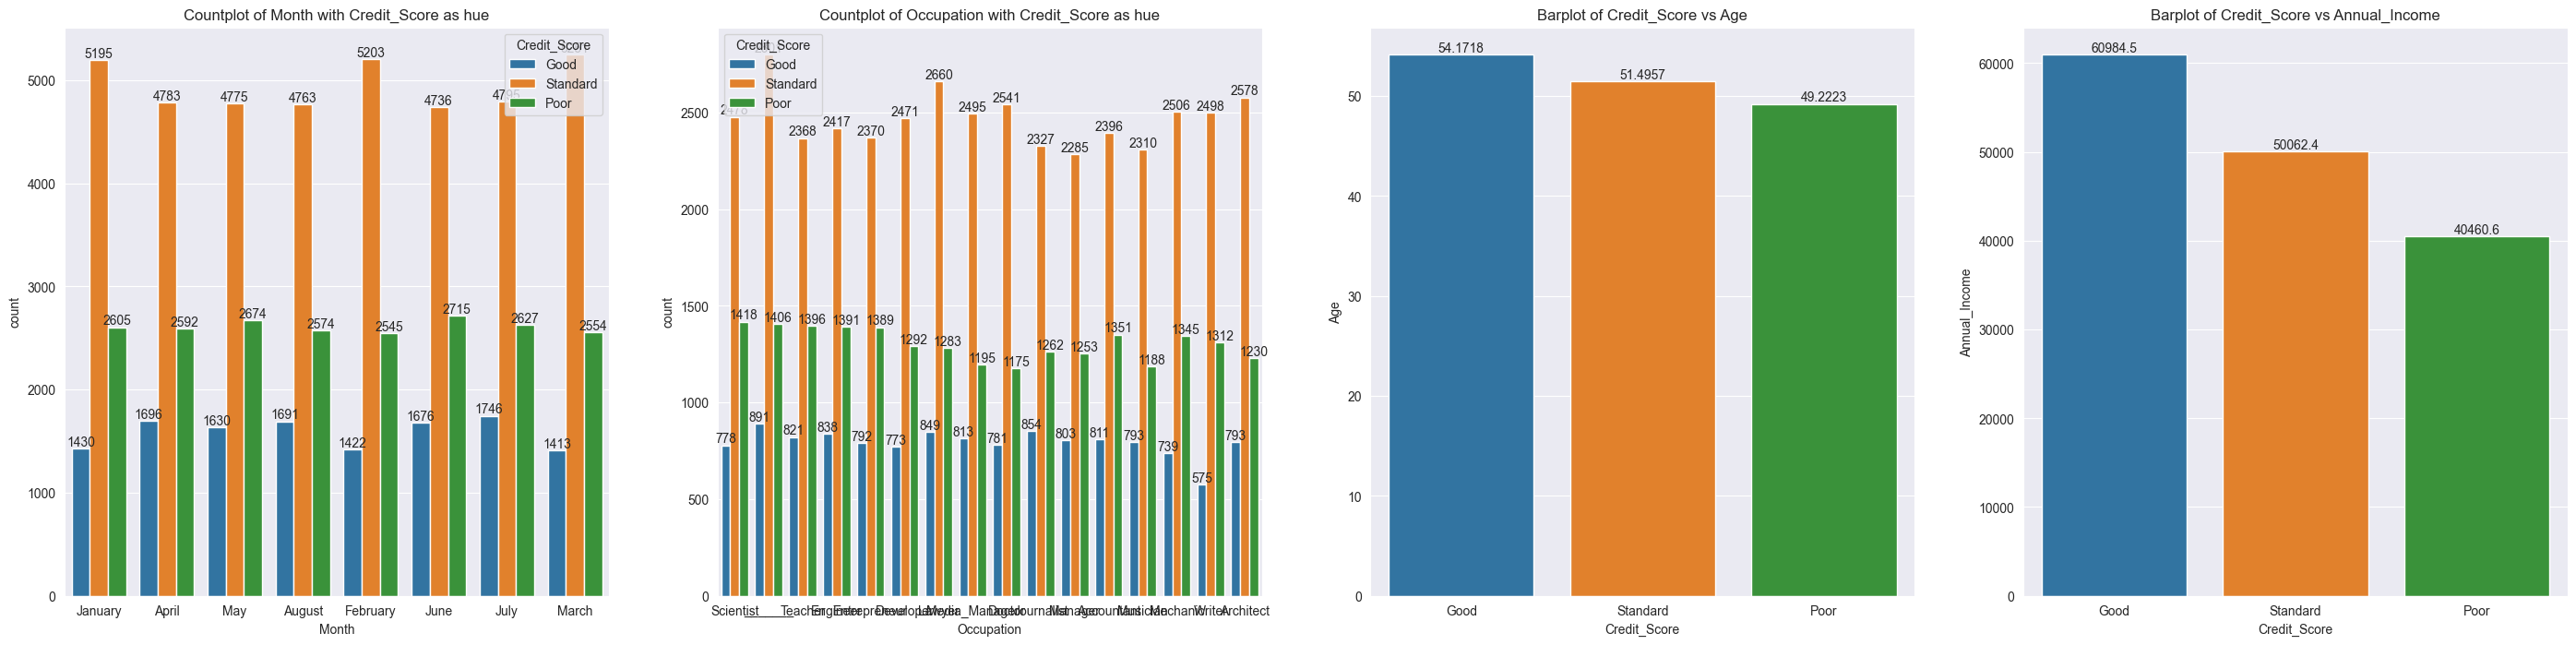

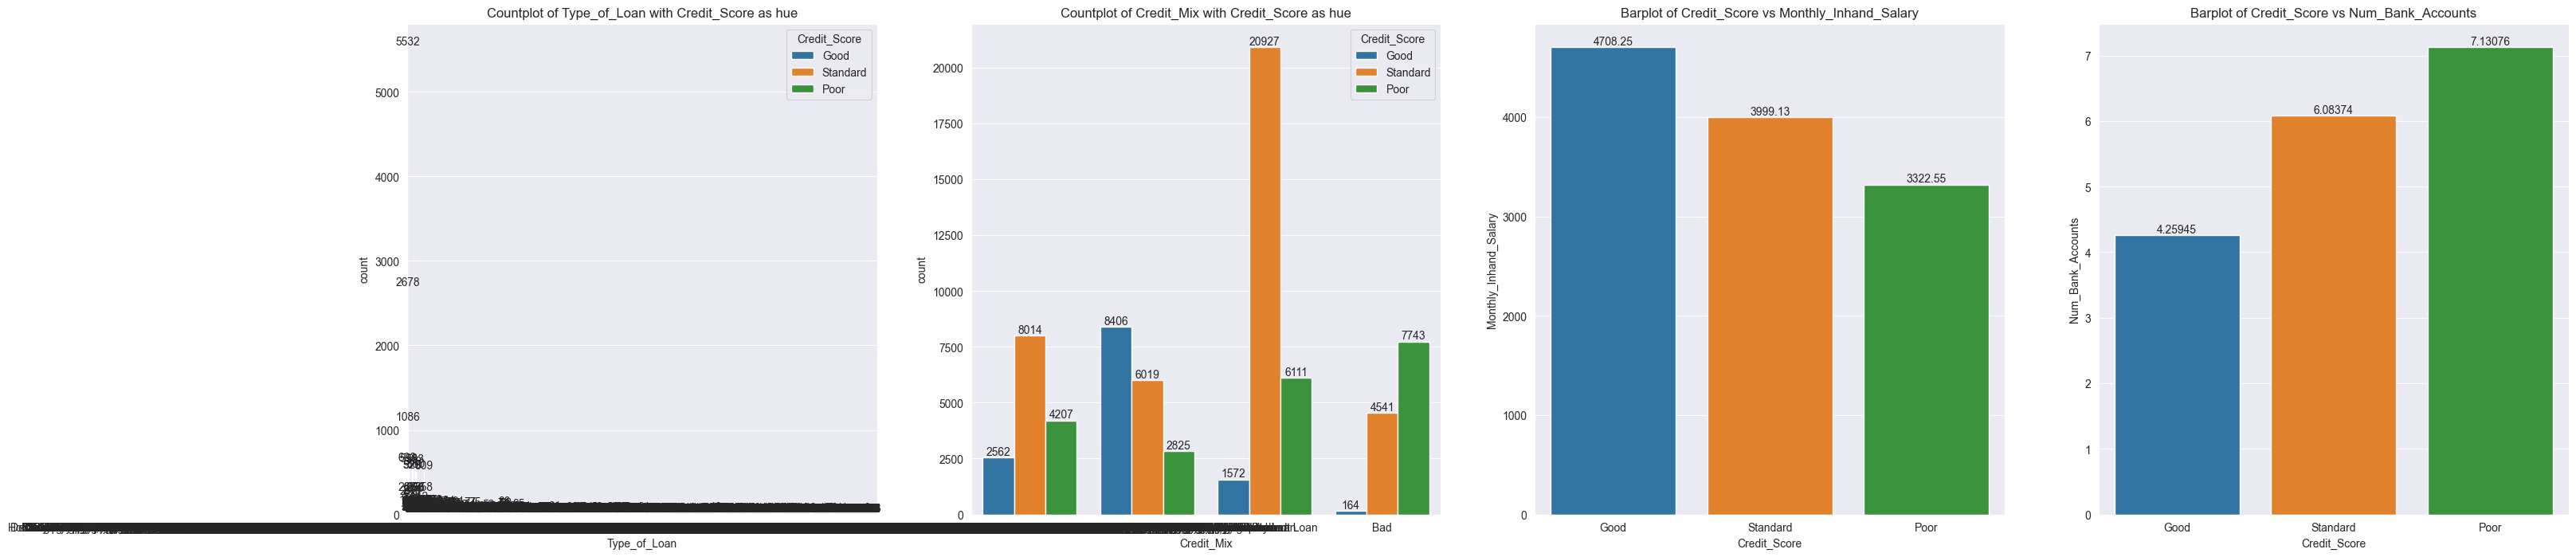

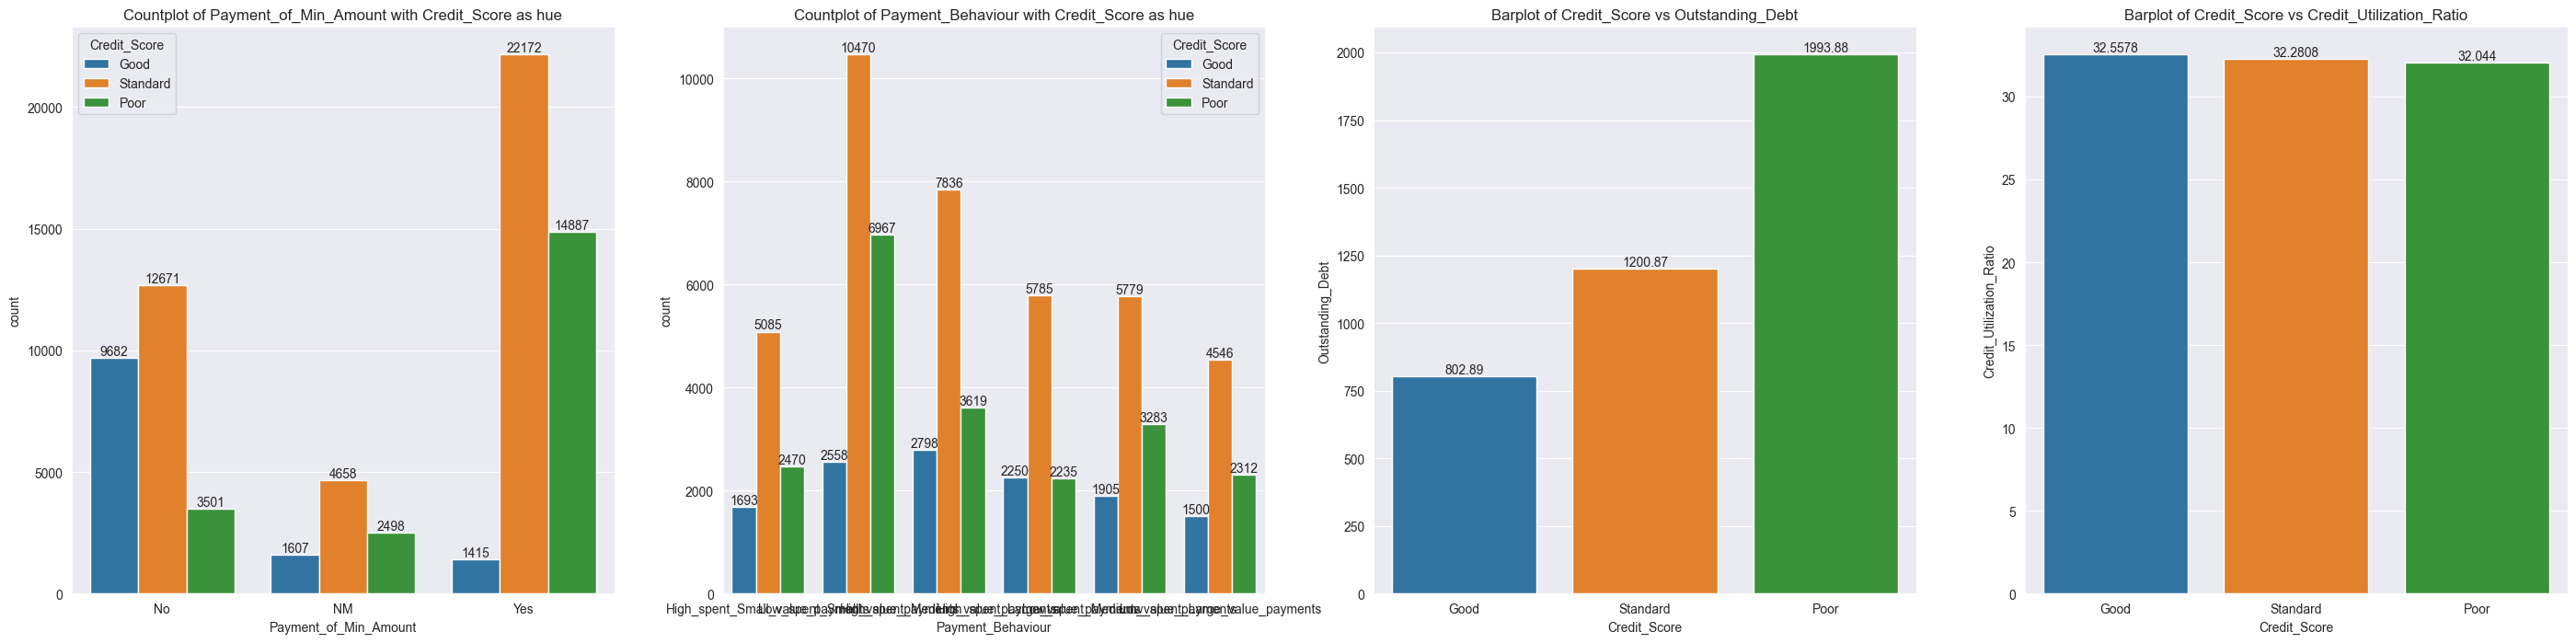

In [188]:
plotter(df, 'Month', 'Occupation', 'Age','Annual_Income', 'Credit_Score')
plotter(df, 'Type_of_Loan','Credit_Mix', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Credit_Score')
plotter(df, 'Payment_of_Min_Amount',	'Payment_Behaviour', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_Score')

In [189]:
#Encoding categorical Columns and saving with joblib
encoded = {}

for i in cat.columns:
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])
    joblib.dump(encoder, open(f"{i}_encoder.pkl", 'wb'))
    encoded[i + '_encoder'] = encoder

In [190]:
df.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,73091.000000,73091.000000,73091.000000,73091.000000,73091.000000,73091.000000,73091.000000,73091.000000,73091.000000,73091.000000,...,73091.000000,73091.000000,73091.000000,73091.000000,73091.000000,73091.000000,73091.000000,73091.000000,73091.000000,73091.000000
mean,3.505575,51.311187,7.532076,49217.051734,3929.048116,6.065849,10.801863,29.661696,-0.601442,3004.587870,...,1.625631,1358.303459,32.261286,18.538298,1.406493,733.579245,610.794027,2.759109,395.493057,1.366625
std,2.286560,218.934018,4.639161,35429.781217,2717.780512,14.971330,54.182404,170.035930,20.189890,1613.523499,...,0.989624,1058.346215,4.929704,7.624106,0.693575,4813.814988,1999.015863,1.832333,186.544162,0.761473
min,0.000000,14.000000,0.000000,7536.015000,531.981250,0.000000,1.000000,1.000000,-100.000000,0.000000,...,0.000000,27.630000,22.748178,1.250000,0.000000,0.000000,16.870016,0.000000,67.578264,0.000000
25%,2.000000,25.000000,4.000000,19725.700000,1848.424167,3.000000,4.000000,7.000000,1.000000,1668.000000,...,1.000000,568.450000,28.125168,13.250000,1.000000,30.230996,78.750220,1.000000,275.703465,1.000000
50%,4.000000,33.000000,7.000000,36926.920000,3089.149167,5.000000,5.000000,13.000000,3.000000,3255.000000,...,2.000000,1142.390000,32.282017,18.170000,2.000000,67.971134,135.891560,3.000000,336.407725,2.000000
75%,6.000000,42.000000,12.000000,70157.515000,5259.270000,7.000000,7.000000,20.000000,5.000000,4298.000000,...,2.000000,1807.000000,36.415946,24.250000,2.000000,153.394994,249.050231,5.000000,461.958033,2.000000
max,7.000000,4041.000000,15.000000,179948.840000,13785.103330,448.000000,848.000000,2863.000000,9.000000,5879.000000,...,3.000000,4806.960000,42.449930,33.000000,2.000000,56209.000000,10000.000000,5.000000,1139.130427,2.000000


In [191]:
#Scaling of all values and saving with joblib
scaled = {}
for i in df.columns[:-1]:
    scaler = MinMaxScaler()
    df[i] = scaler.fit_transform(df[[i]])
    joblib.dump(scaler, open(f"{i}_scaler.pkl", 'wb'))
    scaled[i + "_scaler"] = scaler

In [192]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0.428571,0.002235,0.8,0.067153,0.097552,0.006696,0.003542,0.000699,0.954128,0.020752,...,1.000000,0.163694,0.206806,0.656063,0.5,0.000882,0.006365,0.4,0.228562,0
3,0.000000,0.002235,0.8,0.067153,0.192948,0.006696,0.003542,0.000699,0.954128,0.020752,...,0.333333,0.163694,0.438016,0.663937,0.5,0.000882,0.018290,1.0,0.145465,0
4,1.000000,0.002235,0.8,0.067153,0.097552,0.006696,0.003542,0.000699,0.954128,0.020752,...,0.333333,0.163694,0.104009,0.666772,0.5,0.000882,0.002459,0.2,0.255621,0
7,0.142857,0.002235,0.8,0.067153,0.097552,0.006696,0.003542,0.000699,0.954128,0.020752,...,0.333333,0.163694,0.060178,0.532913,0.5,0.000882,0.000793,0.2,0.271145,2
8,0.428571,0.003477,1.0,0.158409,0.189088,0.004464,0.003542,0.001747,0.926606,0.110733,...,0.333333,0.120812,0.087091,0.797795,0.5,0.000335,0.008757,1.0,0.376195,2


<h3>Feature Selection using xgboost<h3>

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1500x700 with 0 Axes>

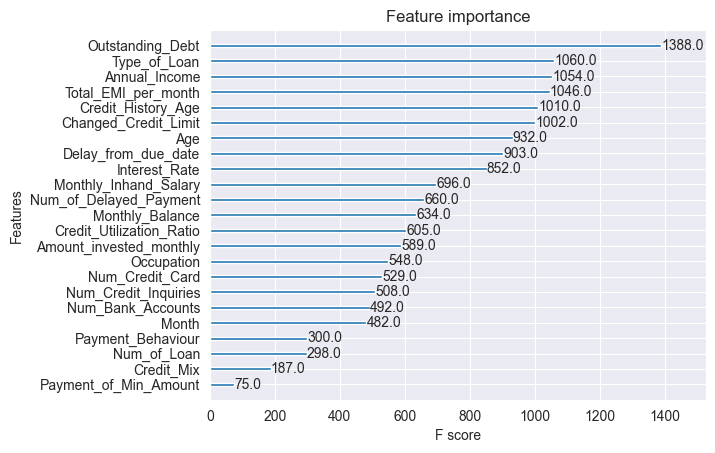

In [193]:
x = df.drop('Credit_Score', axis = 1)
y = df['Credit_Score']

model = xgb.XGBClassifier()
model.fit(x,y)
plt.figure(figsize=(15,7))
xgb.plot_importance(model, importance_type='weight')


In [194]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [195]:
predictors = ['Outstanding_Debt', 'Type_of_Loan', 'Annual_Income', 'Total_EMI_per_month', 
              'Credit_History_Age', 'Changed_Credit_Limit', 'Delay_from_due_date', 'Age', 'Interest_Rate']

x = df[predictors]
y = df['Credit_Score']


<h3>Data Modelling

In [196]:
model_rfn = RandomForestClassifier(n_estimators=200, min_samples_split=35)
model_tree = DecisionTreeClassifier()
model_xgb = xgb.XGBClassifier()

<Axes: xlabel='Credit_Score', ylabel='count'>

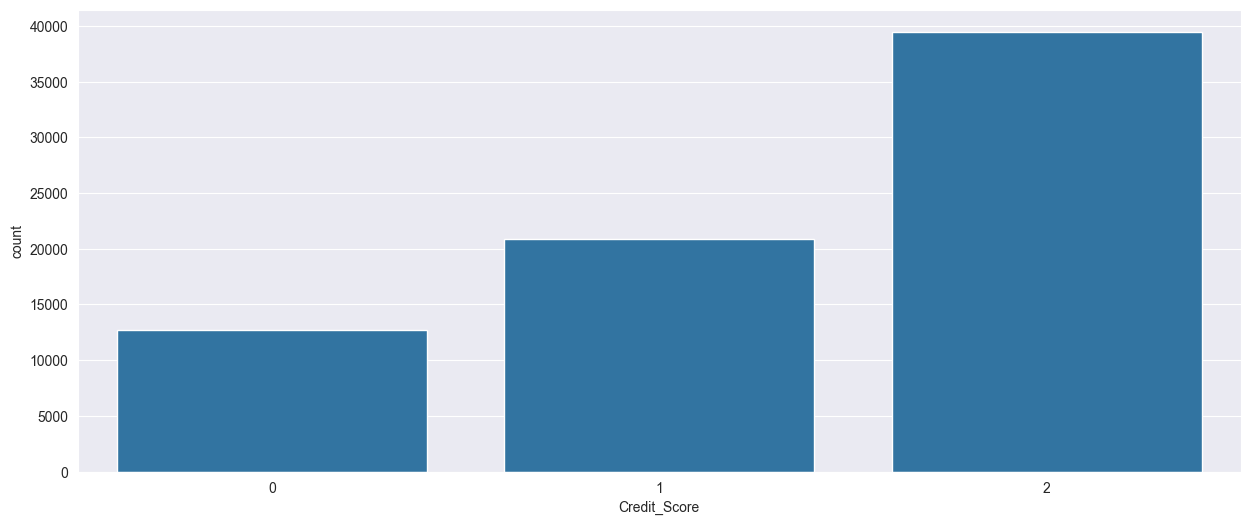

In [212]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x= 'Credit_Score')

<h3>Use of smote to generate syntethic data to address imbalanced dataset

In [213]:
sm = SMOTE()
xresampled, yresampled = sm.fit_resample(df[predictors], df['Credit_Score'])

<Axes: xlabel='Credit_Score', ylabel='count'>

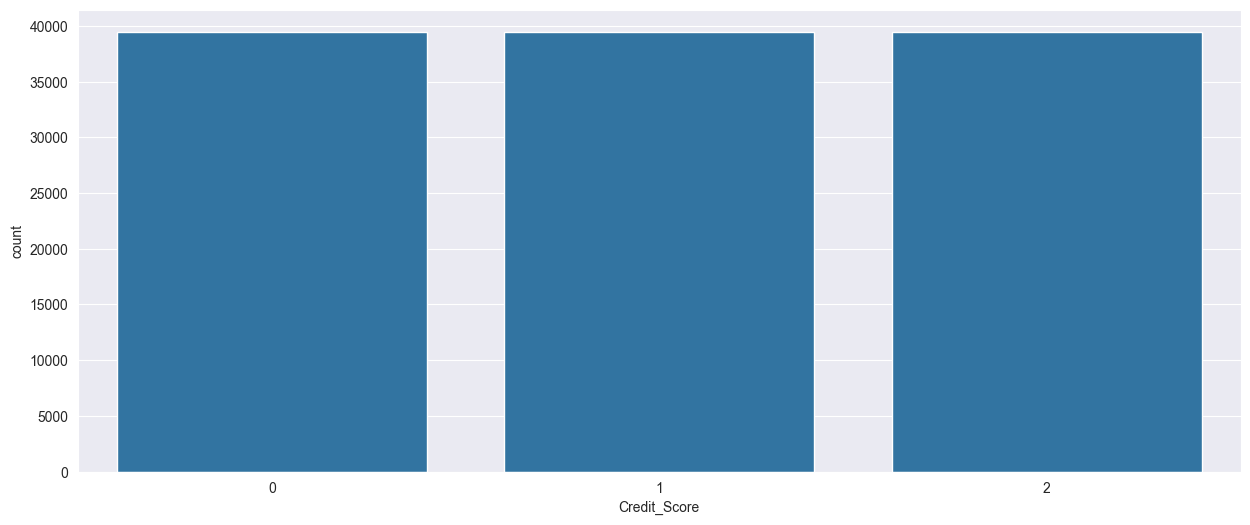

In [214]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x= yresampled)

In [225]:
#function to train data and predict y. The function also measures accuracy score and returns a dataframe showing ytest and predicted y
def predict(model):
    x = xresampled
    y = yresampled
    xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=50)
    model.fit(xtrain, ytrain)
    cross_val = model.predict(xtrain)
    cross_score = accuracy_score(ytrain, cross_val)
    print(f"The validation score is {cross_score}")
    ypred = model.predict(xtest)
    test_score = accuracy_score(ytest, ypred)
    print(f"The test score is {test_score}")
    ypred = pd.Series(ypred, index = ytest.index, name = 'Predictions')
    compare = pd.concat([ytest, ypred], axis = 1)
    return compare

In [226]:
compare = predict(model_rfn)

The validation score is 0.8762789814560874
The test score is 0.8140584785452091


In [227]:
compare.head(20)

,Credit_Score,Predictions
62583,0,0
92591,0,0
74742,0,0
5460,2,2
47049,2,2
80323,0,0
104271,1,0
93130,0,0
52961,2,1
17218,0,0


In [228]:
cross_val_tree, compare_tree = predict(model_tree)

The validation score is 0.9993249087571993
The test score is 0.8073920931606261


In [229]:
cross_val_tree, compare_tree = predict(model_xgb)

The validation score is 0.8367334022488977
The test score is 0.7970549765832665


<h3>Random Forest Model seems to be the best model of the 3 used. Decision tree seems to have overfitted with the  high difference between train validation score and ytest test_score<h3>